# Objective


In [ ]:
#Hand written digit prediction using Random Forest Classifier

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a dataset


from sklearn.datasets import load_digits
df=load_digits()

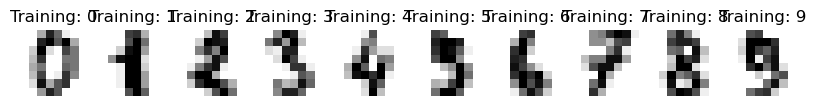

In [8]:
_, axes=plt.subplots(nrows=1, ncols=10, figsize=(10,3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)
    

# Data Visualization

In [10]:
df.images.shape

(1797, 8, 8)

In [11]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [12]:
df.images[0].shape

(8, 8)

In [13]:
len(df.images)

1797

In [16]:
n_samples=len(df.images)
data=df.images.reshape((n_samples,-1))

In [17]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [18]:
data[0].shape

(64,)

In [19]:
data.shape

(1797, 64)

In [20]:
data.min()

0.0

In [21]:
data.max()

16.0

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Train Test Split

In [23]:
X_train, X_test, Y_train, Y_test=train_test_split(data, df.target, test_size=0.3)

# Modeling

In [25]:
rf=RandomForestClassifier()

# Model Evaluation

In [26]:
rf.fit(X_train, Y_train)

RandomForestClassifier()

# Prediction

In [27]:
y_pred=rf.predict(X_test)

In [28]:
y_pred

array([0, 4, 2, 6, 3, 9, 2, 7, 3, 2, 7, 0, 0, 3, 9, 4, 6, 9, 0, 0, 9, 7,
       1, 4, 9, 0, 5, 3, 4, 9, 8, 9, 7, 7, 8, 7, 4, 8, 7, 6, 6, 4, 0, 2,
       9, 1, 2, 8, 9, 5, 3, 1, 1, 5, 3, 6, 2, 0, 2, 5, 6, 2, 3, 5, 6, 0,
       9, 2, 4, 2, 8, 3, 2, 8, 3, 5, 1, 4, 5, 4, 1, 9, 7, 3, 3, 2, 6, 7,
       2, 9, 8, 6, 0, 4, 6, 0, 3, 2, 4, 3, 8, 9, 5, 4, 5, 6, 6, 7, 9, 7,
       9, 8, 6, 5, 1, 1, 1, 1, 2, 7, 2, 3, 7, 9, 8, 1, 9, 5, 1, 2, 8, 4,
       1, 4, 5, 4, 8, 1, 1, 4, 2, 3, 6, 8, 5, 2, 1, 8, 0, 7, 9, 7, 1, 0,
       2, 8, 8, 5, 0, 0, 8, 7, 2, 3, 0, 8, 2, 2, 6, 6, 5, 7, 9, 3, 5, 6,
       4, 3, 0, 4, 4, 7, 9, 4, 1, 6, 1, 3, 7, 4, 1, 9, 8, 6, 8, 2, 2, 7,
       3, 1, 5, 5, 6, 8, 3, 1, 5, 7, 3, 9, 3, 5, 2, 7, 6, 9, 2, 9, 8, 0,
       3, 9, 8, 2, 4, 5, 6, 3, 4, 5, 3, 6, 2, 9, 8, 4, 7, 8, 2, 1, 9, 1,
       5, 9, 9, 2, 4, 1, 0, 3, 3, 8, 8, 2, 6, 0, 2, 0, 0, 2, 7, 9, 1, 1,
       2, 0, 9, 8, 0, 4, 1, 0, 3, 5, 9, 9, 5, 9, 1, 9, 2, 9, 9, 3, 0, 4,
       1, 3, 8, 7, 8, 7, 2, 0, 4, 1, 9, 1, 0, 1, 6,

In [31]:
confusion_matrix(Y_test, y_pred)

array([[55,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 56,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 63,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 51,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 42,  0,  0,  2,  0,  2],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  1,  0, 54,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  2, 52,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  1,  1, 56]], dtype=int64)

In [33]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        56
           1       0.98      1.00      0.99        56
           2       1.00      1.00      1.00        63
           3       0.98      0.94      0.96        54
           4       0.95      0.91      0.93        46
           5       1.00      0.96      0.98        48
           6       1.00      0.98      0.99        55
           7       0.89      0.98      0.93        49
           8       0.96      0.96      0.96        54
           9       0.92      0.95      0.93        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



# Explaination


In [ ]:
#The precision of model lies between 0.9 to 1. that is considered as a good model.